In [221]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv('yield_df.csv')

In [223]:
df.head(2)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990.0,36613.0,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990.0,66667.0,1485.0,121.0,16.37


In [224]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [225]:
df.shape

(18999, 7)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18999 entries, 0 to 18998
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           18999 non-null  object 
 1   Item                           18998 non-null  object 
 2   Year                           18998 non-null  float64
 3   hg/ha_yield                    18998 non-null  float64
 4   average_rain_fall_mm_per_year  18998 non-null  float64
 5   pesticides_tonnes              18998 non-null  float64
 6   avg_temp                       18998 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.0+ MB


In [227]:
df.isnull().sum()

Area                             0
Item                             1
Year                             1
hg/ha_yield                      1
average_rain_fall_mm_per_year    1
pesticides_tonnes                1
avg_temp                         1
dtype: int64

In [228]:
df.duplicated().sum()

1430

In [229]:
df.drop_duplicates(inplace=True)

In [230]:
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [231]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [232]:
df = df.drop(to_drop)

In [233]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990.0,36613.0,1485.0,121.00,16.37
1,Albania,Potatoes,1990.0,66667.0,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990.0,23333.0,1485.0,121.00,16.37
3,Albania,Sorghum,1990.0,12500.0,1485.0,121.00,16.37
4,Albania,Soybeans,1990.0,7000.0,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
18994,Mexico,Potatoes,1990.0,158256.0,758.0,34468.93,19.63
18995,Mexico,Potatoes,1990.0,158256.0,758.0,34468.93,22.63
18996,Mexico,Potatoes,1990.0,158256.0,758.0,34468.93,19.27
18997,Mexico,Potatoes,1990.0,158256.0,758.0,34468.93,16.69


In [234]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [235]:
len(df['Area'].unique())

64

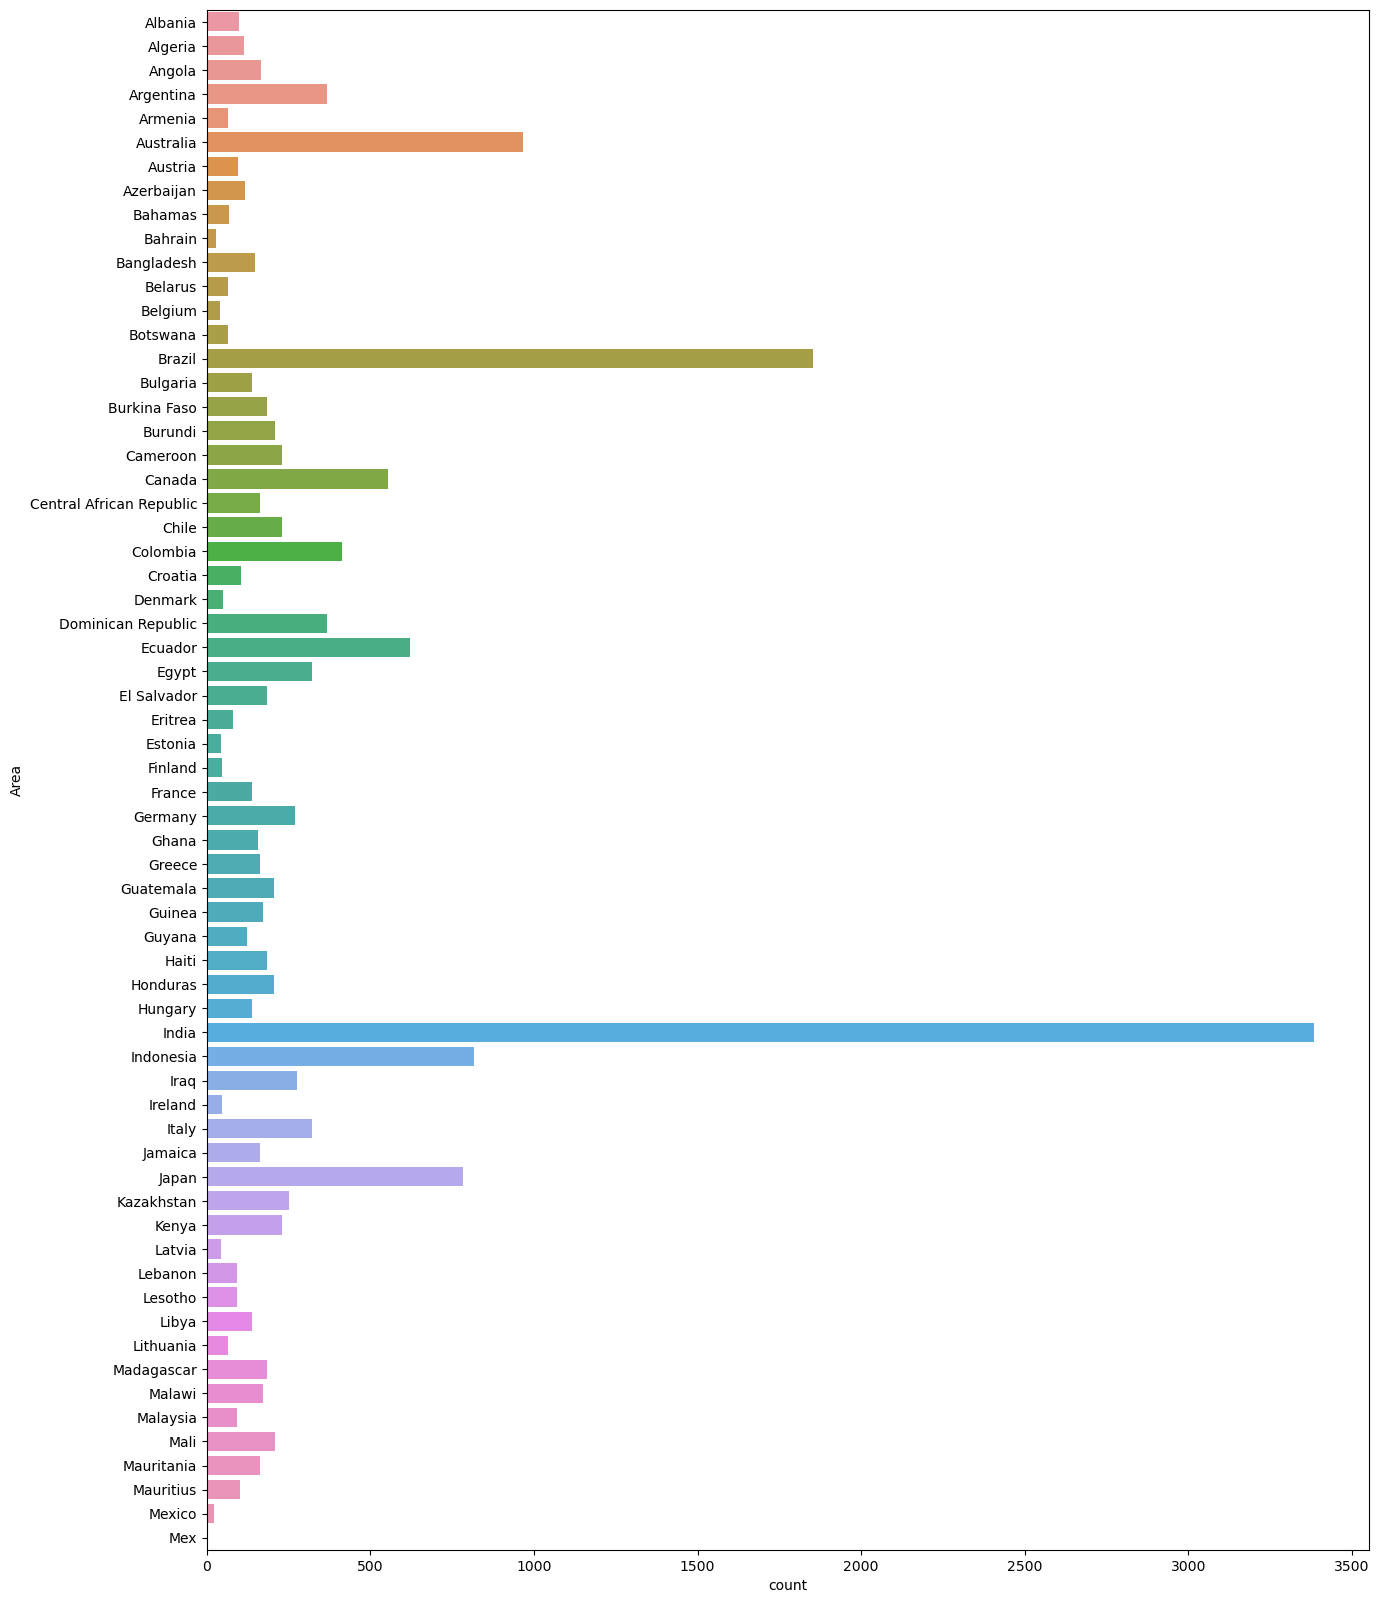

In [236]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [237]:
(df['Area'].value_counts() < 500).sum()

57

# yield_per_country

In [238]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [239]:
df['hg/ha_yield'].sum()

1355285340.0

In [240]:
yield_per_country

[5711536.0,
 6711464.0,
 5722563.0,
 32864032.0,
 4524100.0,
 109111062.0,
 10852258.0,
 4608380.0,
 4384717.0,
 4443889.0,
 7720159.0,
 4704812.0,
 8442270.0,
 470651.0,
 136340329.0,
 6263075.0,
 6083337.0,
 7031146.0,
 10717883.0,
 34706922.0,
 4255627.0,
 20561214.0,
 26927138.0,
 6083167.0,
 10701651.0,
 25312166.0,
 21315591.0,
 36828848.0,
 16855944.0,
 1452416.0,
 3595638.0,
 6210668.0,
 15790618.0,
 38780463.0,
 9260371.0,
 14571925.0,
 16508723.0,
 7975743.0,
 8361103.0,
 8619194.0,
 10920131.0,
 8824110.0,
 274219558.0,
 68067328.0,
 10984722.0,
 9104030.0,
 32280700.0,
 19698007.0,
 100924145.0,
 9965212.0,
 14391737.0,
 3698588.0,
 6956804.0,
 4258932.0,
 9016288.0,
 4174348.0,
 6103523.0,
 8346715.0,
 7934982.0,
 15106720.0,
 4465841.0,
 12684212.0,
 1775914.0,
 0.0]

# Yield Per Country Graph

<Axes: >

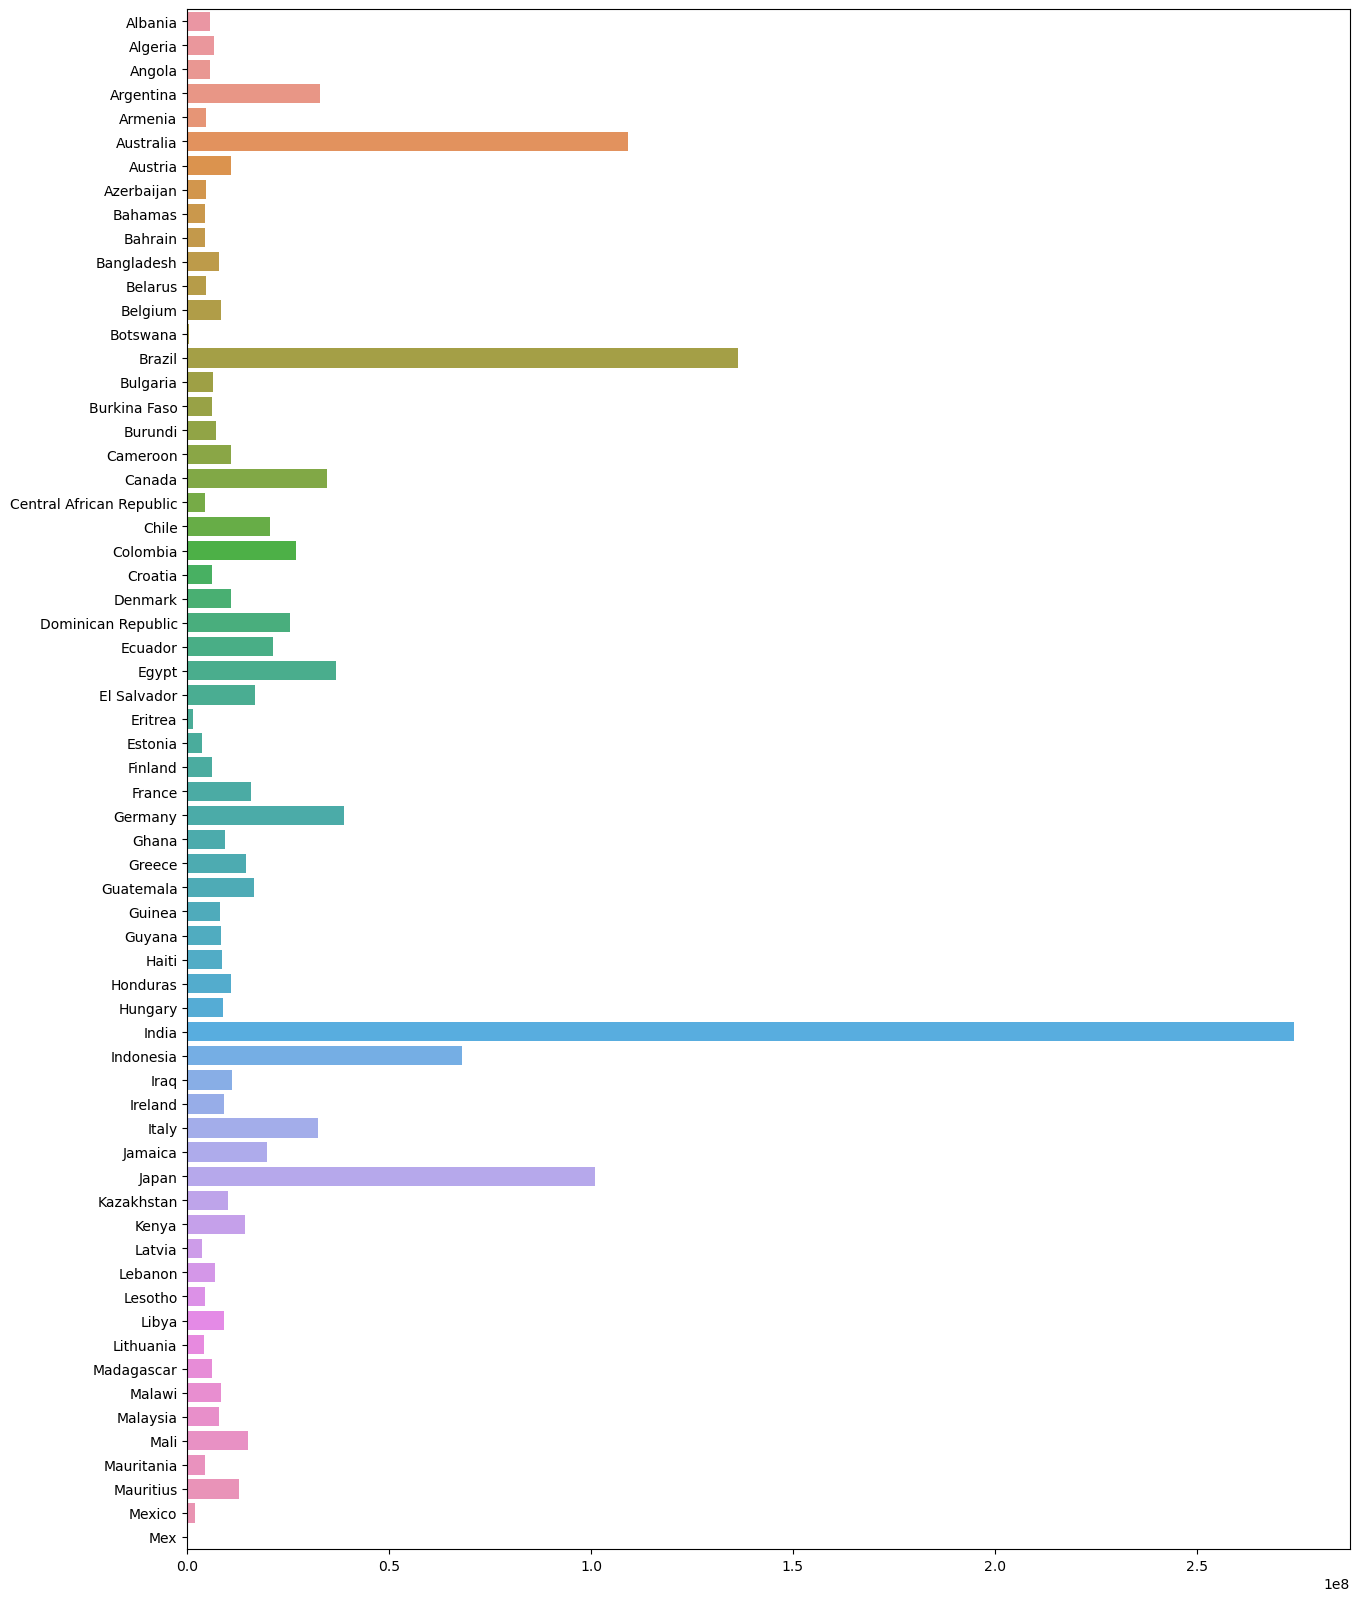

In [241]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

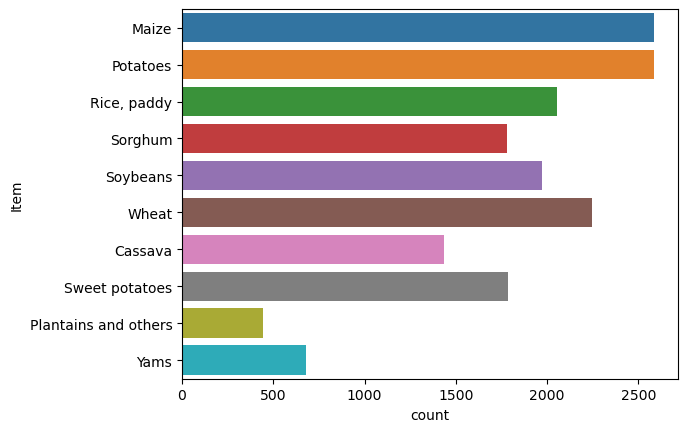

In [242]:
sns.countplot(y=df['Item'])

# Yield Vs Item

In [243]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

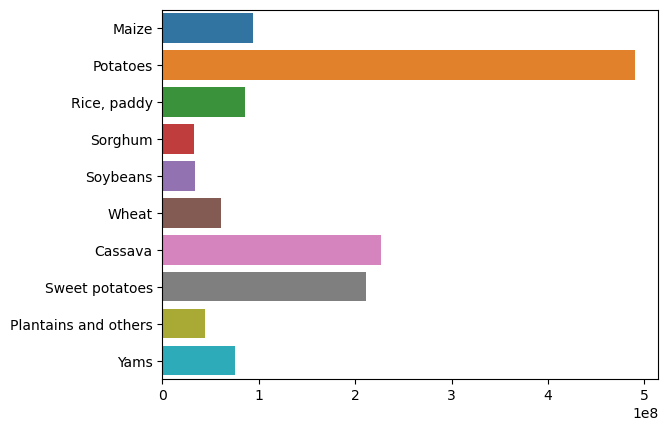

In [244]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [245]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [246]:
df.head(4)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990.0,1485.0,121.0,16.37,Albania,Maize,36613.0
1,1990.0,1485.0,121.0,16.37,Albania,Potatoes,66667.0
2,1990.0,1485.0,121.0,16.37,Albania,"Rice, paddy",23333.0
3,1990.0,1485.0,121.0,16.37,Albania,Sorghum,12500.0


In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [248]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
13543,2008.0,1083.0,14485.33,25.65,India,Potatoes
157,2001.0,89.0,710.11,18.13,Algeria,Wheat
16839,2006.0,1668.0,65248.26,15.92,Japan,Sweet potatoes
7509,1991.0,2274.0,2377.00,21.91,Ecuador,Wheat
14646,1992.0,2702.0,825.00,25.17,Indonesia,Soybeans
...,...,...,...,...,...,...
9795,2006.0,1651.0,376.19,27.20,Guinea,Yams
14326,2012.0,1083.0,52980.00,25.09,India,Soybeans
10415,1998.0,589.0,5280.00,10.35,Hungary,Sorghum
11542,1995.0,1083.0,61257.00,25.92,India,Wheat


In [249]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
12200,1999.0,1083.0,46195.00,25.29,India,Soybeans
8842,2005.0,867.0,78265.00,11.55,France,Wheat
17491,1999.0,630.0,3056.00,16.70,Kenya,Cassava
7836,2005.0,2274.0,18391.23,21.82,Ecuador,Cassava
17618,2012.0,630.0,1578.00,16.84,Kenya,Sweet potatoes
...,...,...,...,...,...,...
12858,2004.0,1083.0,35113.00,26.25,India,"Rice, paddy"
6718,2000.0,3240.0,75843.00,22.01,Colombia,Yams
8576,2012.0,1784.0,2595.16,26.04,El Salvador,Sweet potatoes
1751,2013.0,534.0,45177.18,20.14,Australia,Sorghum


In [250]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
12200,1999.0,1083.0,46195.00,25.29,India,Soybeans
8842,2005.0,867.0,78265.00,11.55,France,Wheat
17491,1999.0,630.0,3056.00,16.70,Kenya,Cassava
7836,2005.0,2274.0,18391.23,21.82,Ecuador,Cassava
17618,2012.0,630.0,1578.00,16.84,Kenya,Sweet potatoes
...,...,...,...,...,...,...
12858,2004.0,1083.0,35113.00,26.25,India,"Rice, paddy"
6718,2000.0,3240.0,75843.00,22.01,Colombia,Yams
8576,2012.0,1784.0,2595.16,26.04,El Salvador,Sweet potatoes
1751,2013.0,534.0,45177.18,20.14,Australia,Sorghum


# Converting Categorical to Numerical and Scaling the values

In [252]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the 'Area' and 'Item' columns in X_train
encoded_train = encoder.fit_transform(X_train[['Area', 'Item']])

# Get the column names after encoding
encoded_columns_train = encoder.get_feature_names_out(['Area', 'Item'])

# Create a DataFrame from the encoded columns with appropriate column names
encoded_df_train = pd.DataFrame(encoded_train, columns=encoded_columns_train, index=X_train.index)

# Drop the original 'Area' and 'Item' columns from X_train
X_train_encoded = X_train.drop(['Area', 'Item'], axis=1)

# Concatenate X_train_encoded with the encoded DataFrame
X_train_encoded = pd.concat([X_train_encoded, encoded_df_train], axis=1)

# Transform the 'Area' and 'Item' columns in X_test
encoded_test = encoder.transform(X_test[['Area', 'Item']])

# Create a DataFrame from the encoded columns with appropriate column names
encoded_df_test = pd.DataFrame(encoded_test, columns=encoded_columns_train, index=X_test.index)

# Drop the original 'Area' and 'Item' columns from X_test
X_test_encoded = X_test.drop(['Area', 'Item'], axis=1)

# Concatenate X_test_encoded with the encoded DataFrame
X_test_encoded = pd.concat([X_test_encoded, encoded_df_test], axis=1)

# Display the encoded DataFrames
print("X_train_encoded:")
print(X_train_encoded)
print("\nX_test_encoded:")
print(X_test_encoded)





X_train_encoded:
         Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
13543  2008.0                         1083.0           14485.33     25.65   
157    2001.0                           89.0             710.11     18.13   
16839  2006.0                         1668.0           65248.26     15.92   
7509   1991.0                         2274.0            2377.00     21.91   
14646  1992.0                         2702.0             825.00     25.17   
...       ...                            ...                ...       ...   
9795   2006.0                         1651.0             376.19     27.20   
14326  2012.0                         1083.0           52980.00     25.09   
10415  1998.0                          589.0            5280.00     10.35   
11542  1995.0                         1083.0           61257.00     25.92   
2955   1994.0                         1761.0           84312.78     26.90   

       Area_Albania  Area_Algeria  Area_Angola  Area_Argen

C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [253]:
X_test_encoded.isnull().sum

<bound method DataFrame.sum of         Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
12200  False                          False              False     False   
8842   False                          False              False     False   
17491  False                          False              False     False   
7836   False                          False              False     False   
17618  False                          False              False     False   
...      ...                            ...                ...       ...   
12858  False                          False              False     False   
6718   False                          False              False     False   
8576   False                          False              False     False   
1751   False                          False              False     False   
9142   False                          False              False     False   

       Area_Albania  Area_Algeria  Area_Angola  Area_Arg

In [254]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item'],
      dtype='object')
Columns in X_test: Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item'],
      dtype='object')


In [255]:
X_test_encoded.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area_Albania', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria',
       'Area_Azerbaijan', 'Area_Bahamas', 'Area_Bahrain', 'Area_Bangladesh',
       'Area_Belarus', 'Area_Belgium', 'Area_Botswana', 'Area_Brazil',
       'Area_Bulgaria', 'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon',
       'Area_Canada', 'Area_Central African Republic', 'Area_Chile',
       'Area_Colombia', 'Area_Croatia', 'Area_Denmark',
       'Area_Dominican Republic', 'Area_Ecuador', 'Area_Egypt',
       'Area_El Salvador', 'Area_Eritrea', 'Area_Estonia', 'Area_Finland',
       'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece',
       'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti',
       'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia',
       'Area_Iraq', 'Area_Ireland', 'Area_Italy', 'Area_Jamaica', 'Area_Japan',
       'Area

In [257]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled (excluding the one-hot encoded columns)
columns_to_scale = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Scale the training data
X_train_encoded[columns_to_scale] = scaler.fit_transform(X_train_encoded[columns_to_scale])

# Scale the test data using the same scaler
X_test_encoded[columns_to_scale] = scaler.transform(X_test_encoded[columns_to_scale])


In [216]:
X_train_encoded

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,Item_nan
7114,-1.493845,0.195361,-0.566098,0.862611,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10360,1.624957,0.964467,-0.532781,0.606240,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10635,-1.635609,-0.248981,0.483029,0.909088,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
817,-1.635609,-0.994986,-0.372914,-0.997957,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16960,1.057902,0.545943,0.272853,-0.780566,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,-0.359735,-0.248981,0.051492,0.808638,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12955,0.349083,-0.248981,-0.114531,0.715685,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5960,0.632611,-0.990909,-0.092662,-1.943983,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-1.493845,-0.994986,-0.372914,-0.312800,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
X_train_encoded

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,Item_nan
7114,-1.493845,0.195361,-0.566098,0.862611,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10360,1.624957,0.964467,-0.532781,0.606240,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10635,-1.635609,-0.248981,0.483029,0.909088,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
817,-1.635609,-0.994986,-0.372914,-0.997957,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16960,1.057902,0.545943,0.272853,-0.780566,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,-0.359735,-0.248981,0.051492,0.808638,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12955,0.349083,-0.248981,-0.114531,0.715685,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5960,0.632611,-0.990909,-0.092662,-1.943983,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-1.493845,-0.994986,-0.372914,-0.312800,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:

X_test_encoded.isnull().sum()

Year                             1
average_rain_fall_mm_per_year    1
pesticides_tonnes                1
avg_temp                         1
Area_Albania                     0
                                ..
Item_Sorghum                     0
Item_Soybeans                    0
Item_Sweet potatoes              0
Item_Wheat                       0
Item_Yams                        0
Length: 77, dtype: int64

# Let's train our model

In [258]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid': Ridge(),
    'Dtr': DecisionTreeRegressor()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)  # Each model in the pipeline
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"{name} : mae : {abs(scores.mean())} score : {scores.mean()}")

lr : mae : 30612.176734258268 score : -30612.176734258268


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+12, tolerance: 7.895e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+11, tolerance: 7.912e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.675e+10, toleranc

lss : mae : 30597.846626649734 score : -30597.846626649734
Rid : mae : 30551.74288664054 score : -30551.74288664054
Dtr : mae : 3975.2983279971536 score : -3975.2983279971536


In [ ]:
#PLOTTING GRAPHS FOR ALL THE MODELS

Model: Linear Regression
Mean MAE: 30612.18
Mean MSE: 1878379488.68
Mean R2 Score: 0.73
Model: Linear Regression


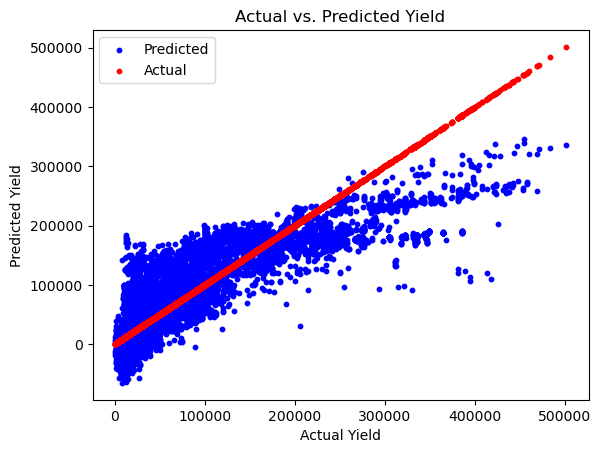

Model: Lasso Regression


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+12, tolerance: 7.895e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+11, tolerance: 7.912e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.675e+10, toleranc

Mean MAE: 30597.85
Mean MSE: 1878277684.90
Mean R2 Score: 0.73
Model: Lasso Regression


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+12, tolerance: 7.895e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+11, tolerance: 7.912e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.675e+10, toleranc

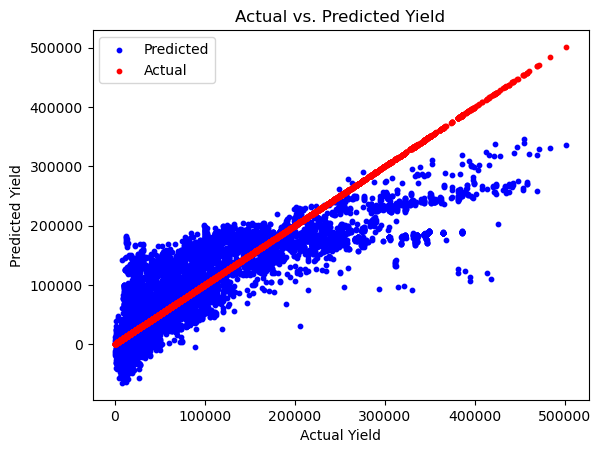

Model: Ridge Regression
Mean MAE: 30551.74
Mean MSE: 1878313537.56
Mean R2 Score: 0.73
Model: Ridge Regression


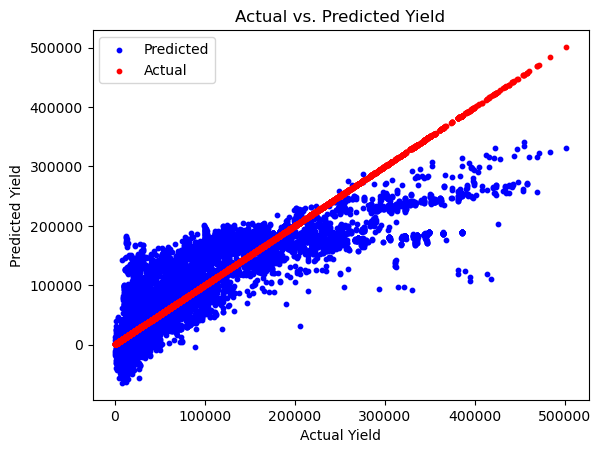

Model: Decision Tree Regressor
Mean MAE: 3978.27
Mean MSE: 154625023.41
Mean R2 Score: 0.98
Model: Decision Tree Regressor


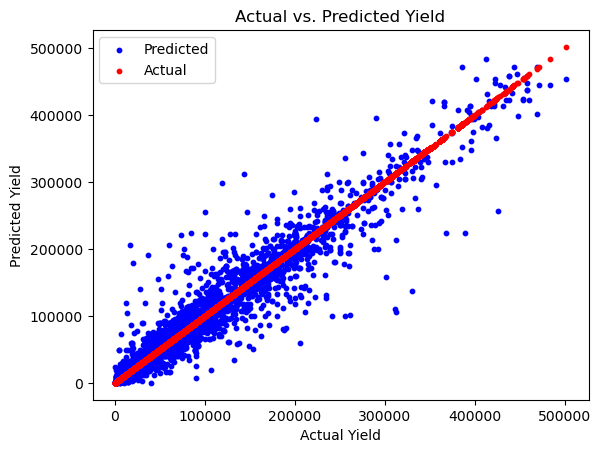

Model: Random Forest Regressor
Mean MAE: 3822.12
Mean MSE: 100536965.44
Mean R2 Score: 0.99
Model: Random Forest Regressor


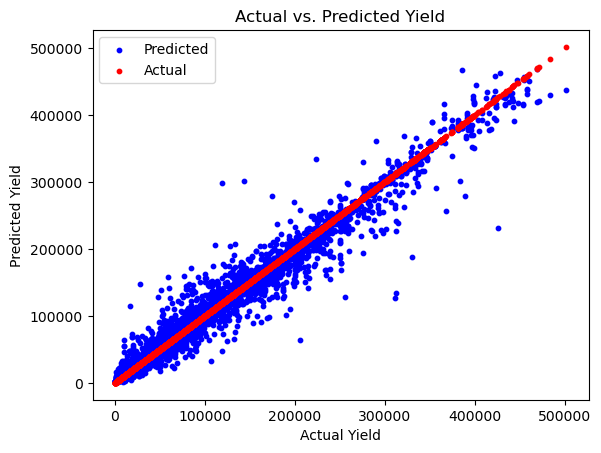

Model: Gradient Boosting Regressor
Mean MAE: 18207.46
Mean MSE: 777289964.17
Mean R2 Score: 0.89
Model: Gradient Boosting Regressor


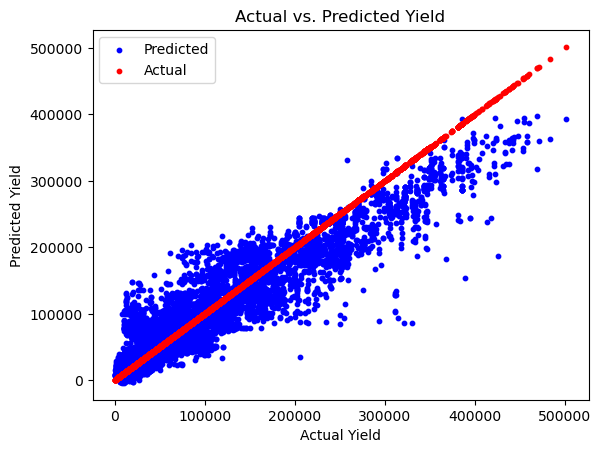

In [109]:
# from sklearn.model_selection import cross_validate

# # Define evaluation metrics
# scoring = {
#     'MAE': 'neg_mean_absolute_error',
#     'MSE': 'neg_mean_squared_error',
#     'R2': 'r2'
# }

# # Define a function to calculate and print evaluation metrics
# def evaluate_model(model, model_name, X_train, y_train, cv=5):
#     print(f"Model: {model_name}")
#     scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
#     mean_mae = -scores['test_MAE'].mean()
#     mean_mse = -scores['test_MSE'].mean()
#     mean_r2 = scores['test_R2'].mean()
#     print(f"Mean MAE: {mean_mae:.2f}")
#     print(f"Mean MSE: {mean_mse:.2f}")
#     print(f"Mean R2 Score: {mean_r2:.2f}")

# # Define a function to plot predicted vs. actual values
# def plot_predictions(model, model_name, X_train, y_train, cv=5):
#     print(f"Model: {model_name}")
#     y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
#     plt.scatter(y_train, y_pred, color='blue', label='Predicted', s=10)  # Set size to 10
#     plt.scatter(y_train, y_train, color='red', label='Actual', s=10)  # Set size to 10
#     plt.xlabel('Actual Yield')
#     plt.ylabel('Predicted Yield')
#     plt.title('Actual vs. Predicted Yield')
#     plt.legend()
#     plt.show()

# # Implement and evaluate each model
# models = {
#     'Linear Regression': LinearRegression(),
#     'Lasso Regression': Lasso(),
#     'Ridge Regression': Ridge(),
#     'Decision Tree Regressor': DecisionTreeRegressor(),
#     'Random Forest Regressor': RandomForestRegressor(),
#     'Gradient Boosting Regressor': GradientBoostingRegressor()
# }

# for model_name, model in models.items():
#     evaluate_model(model, model_name, X_train_encoded, y_train)
#     plot_predictions(model, model_name, X_train_encoded, y_train)


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+12, tolerance: 7.895e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.800e+11, tolerance: 7.912e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.675e+10, toleranc

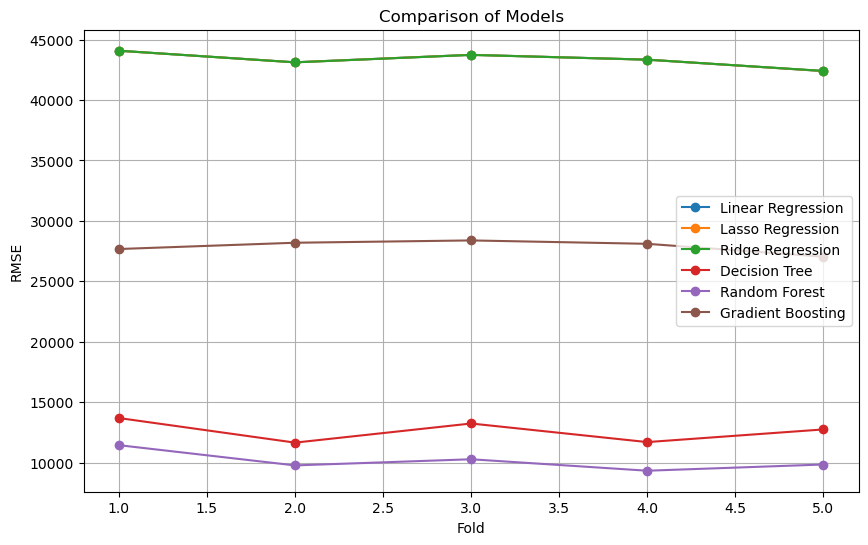

In [263]:
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.model_selection import cross_val_score
# import numpy as np

# # Define models
# models = {
#     'Linear Regression': LinearRegression(),
#     'Lasso Regression': Lasso(),
#     'Ridge Regression': Ridge(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor()
# }

# # Perform cross-validation and store results
# results = {}
# for name, model in models.items():
#     scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
#     results[name] = np.sqrt(-scores)

# # Plotting
# plt.figure(figsize=(10, 6))
# for name, scores in results.items():
#     plt.plot(np.arange(1, 6), scores, marker='o', label=name)
# plt.xlabel('Fold')
# plt.ylabel('RMSE')
# plt.title('Comparison of Models')
# plt.legend()
# plt.grid(True)
# plt.show()


C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

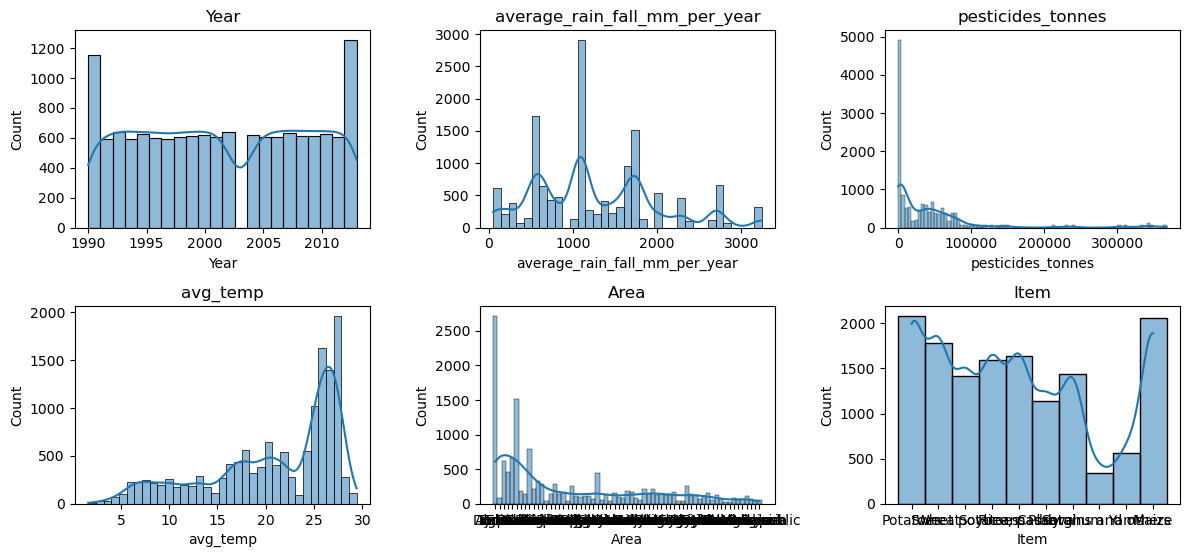

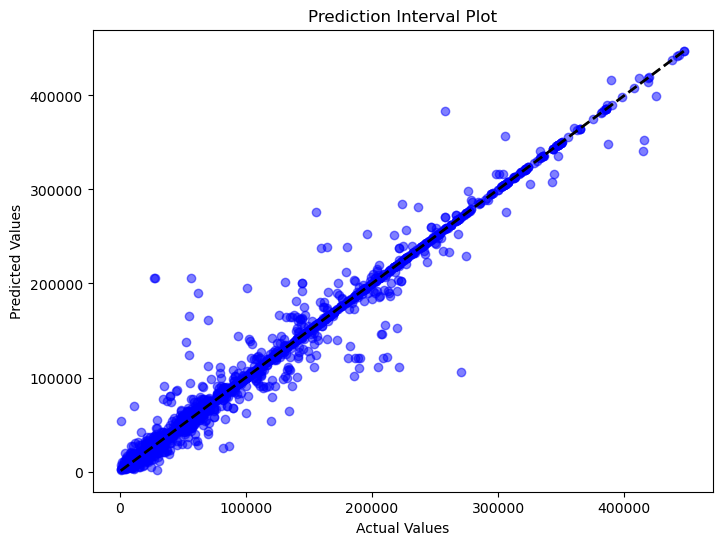

In [264]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Feature Distribution Plot
# def plot_feature_distribution(X_train, feature_names):
#     plt.figure(figsize=(12, 8))
#     for i, feature in enumerate(feature_names):
#         plt.subplot(3, 3, i+1)
#         sns.histplot(X_train[feature], kde=True)
#         plt.title(feature)
#     plt.tight_layout()
#     plt.show()

# plot_feature_distribution(X_train, X_train.columns)

# # 2. Prediction Interval Plot
# def plot_prediction_interval(y_test, y_pred):
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.title('Prediction Interval Plot')
#     plt.show()

# plot_prediction_interval(y_test, y_pred)


In [194]:

X_test_encoded.isnull().sum()

Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Area_Albania                     0
                                ..
Item_Sorghum                     0
Item_Soybeans                    0
Item_Sweet potatoes              0
Item_Wheat                       0
Item_Yams                        0
Length: 78, dtype: int64

In [260]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming X_train_encoded and X_test_encoded are your encoded DataFrames

# Instantiate SimpleImputer with a strategy to impute missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns)

# Transform the test data using the fitted imputer
X_test_imputed = imputer.transform(X_test_encoded)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_encoded.columns)

# Now you can use X_train_imputed and X_test_imputed in your further analysis



In [197]:
X_train_imputed.isnull().sum()

Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
Area_Albania                     0
                                ..
Item_Sorghum                     0
Item_Soybeans                    0
Item_Sweet potatoes              0
Item_Wheat                       0
Item_Yams                        0
Length: 78, dtype: int64

# Select model

In [198]:
y_test.isnull().sum()

0

In [261]:
from sklearn.impute import SimpleImputer

# Reshape y_test to a 2D array
y_test_reshaped = y_test.values.reshape(-1, 1)

# Instantiate SimpleImputer with a strategy to impute missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the reshaped y_test
y_test_imputed = imputer.fit_transform(y_test_reshaped)

# Convert the imputed array back to a series
y_test_imputed_series = pd.Series(y_test_imputed.flatten(), index=y_test.index)

# Now y_test_imputed_series does not contain any NaN values


In [140]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

# # Create an instance of RandomForestRegressor
# final_model = RandomForestRegressor()

# # Fit the model on the entire training dataset
# final_model.fit(X_train_imputed, y_train)

# # Predict the target variable on the test dataset
# y_pred = final_model.predict(X_test_imputed)

# # Evaluate the model's performance
# mae_rf = mean_absolute_error(y_test_imputed_series, y_pred)
# r2_rf = r2_score(y_test_imputed_series, y_pred)

# # Print the evaluation metrics
# print(f"Random Forest Model:")
# print(f"Mean Absolute Error: {mae_rf}")
# print(f"R^2 Score: {r2_rf}")


Random Forest Model:
Mean Absolute Error: 3221.5994549774546
R^2 Score: 0.989716947508692


In [266]:
 from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Create an instance of RandomForestRegressor
final_model =DecisionTreeRegressor()

# Fit the model on the entire training dataset
final_model.fit(X_train_imputed, y_train)

# Predict the target variable on the test dataset
y_pred = final_model.predict(X_test_imputed)

# Evaluate the model's performance
mae_rf = mean_absolute_error(y_test_imputed_series, y_pred)
r2_rf = r2_score(y_test_imputed_series, y_pred)

# Print the evaluation metrics
print(f"DecisionTreeRegressor:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R^2 Score: {r2_rf}")

DecisionTreeRegressor:
Mean Absolute Error: 3380.327004778252
R^2 Score: 0.9808608634669176


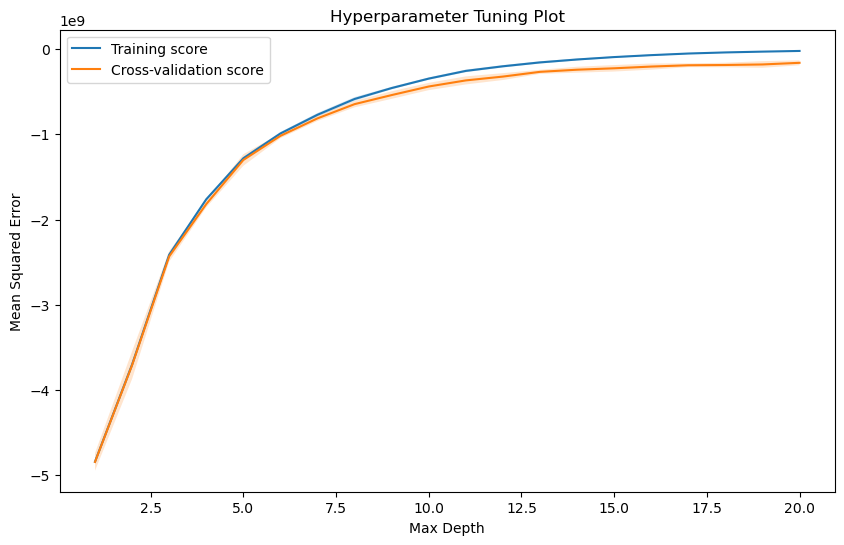

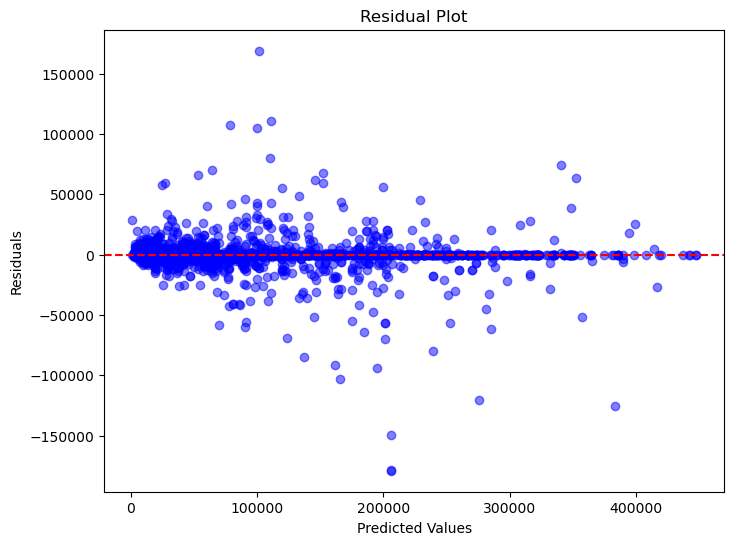

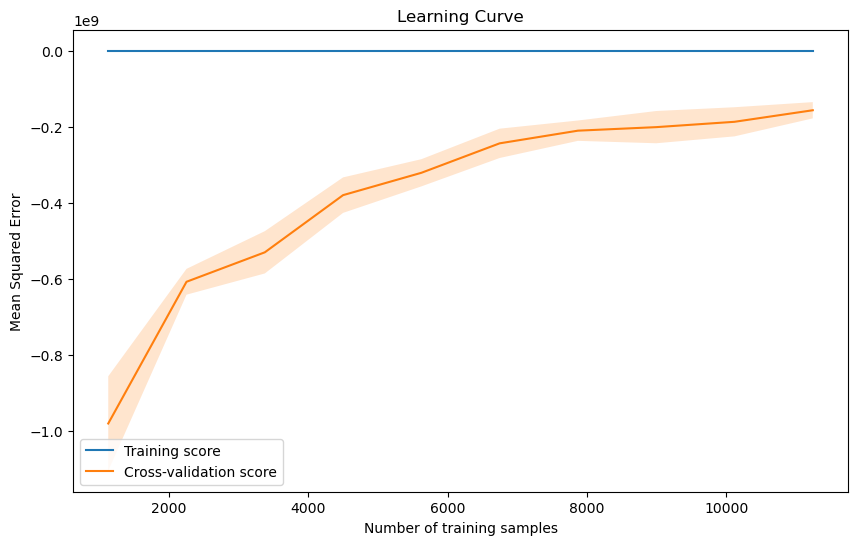

In [269]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import validation_curve, learning_curve

# # Hyperparameter Tuning Plot
# param_range = np.arange(1, 21)
# train_scores, test_scores = validation_curve(final_model, X_train_imputed, y_train, 
#                                              param_name='max_depth', param_range=param_range, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)
# plt.figure(figsize=(10, 6))
# plt.plot(param_range, train_mean, label='Training score')
# plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.plot(param_range, test_mean, label='Cross-validation score')
# plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title('Hyperparameter Tuning Plot')
# plt.xlabel('Max Depth')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.show()

# # Residual Plot
# y_pred = final_model.predict(X_test_imputed)
# residuals = y_test - y_pred
# plt.figure(figsize=(8, 6))
# plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

# # Learning Curve
# train_sizes, train_scores_lc, test_scores_lc = learning_curve(final_model, X_train_imputed, y_train, 
#                                                               train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error', n_jobs=1)
# train_mean_lc = np.mean(train_scores_lc, axis=1)
# train_std_lc = np.std(train_scores_lc, axis=1)
# test_mean_lc = np.mean(test_scores_lc, axis=1)
# test_std_lc = np.std(test_scores_lc, axis=1)
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean_lc, label='Training score')
# plt.fill_between(train_sizes, train_mean_lc - train_std_lc, train_mean_lc + train_std_lc, alpha=0.2)
# plt.plot(train_sizes, test_mean_lc, label='Cross-validation score')
# plt.fill_between(train_sizes, test_mean_lc - test_std_lc, test_mean_lc + test_std_lc, alpha=0.2)
# plt.title('Learning Curve')
# plt.xlabel('Number of training samples')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.show()


# Predictive System

In [146]:
# def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
#     # Create an array of the input features
#     features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

#     # Transform the features using the preprocessor
#     transformed_features = preprocesser.transform(features)

#     # Make the prediction
#     predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

#     return predicted_yield[0]

# Year = 1990
# average_rain_fall_mm_per_year =1485.0
# pesticides_tonnes = 121.00
# avg_temp = 16.37                   
# Area = 'Albania'
# Item = 'Maize'
# result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'Year': [Year],
        'average_rain_fall_mm_per_year': [average_rain_fall_mm_per_year],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp],
        'Area': [Area],
        'Item': [Item]
    })

    # Apply the same preprocessing steps
    encoded_input_data = encoder.transform(input_data[['Area', 'Item']])
    scaled_input_data = scaler.transform(input_data[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])

    # Concatenate the scaled and encoded features
    transformed_features = np.hstack((scaled_input_data, encoded_input_data))

    # Make the prediction
    predicted_yield = final_model.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

# Example input
Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                 
Area = 'Albania'
Item = 'Maize'

# Call the prediction function
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

print(result)

[36613.]


C:\Users\saksh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
1990	1485.0	121.00	16.37	Albania	Maize	36613
